<a href="https://colab.research.google.com/github/anhminh-0792/ProjectAI/blob/master/AIModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
try :
  from google.colab import drive
  drive.mount('/content/drive')
  cur_dir = "/content/drive/MyDrive/Mô hình ML"
except :
  cur_dir = "."
pass
cur_dir = os.path.abspath(cur_dir)
os.chdir(cur_dir)
print(f'cur_dir: {cur_dir} \n --> {os.path.abspath(".")}')

Mounted at /content/drive
cur_dir: /content/drive/MyDrive/Mô hình ML 
 --> /content/drive/MyDrive/Mô hình ML


In [ ]:
import os, sys
from IPython import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# **1. Load Dataset**

In [ ]:
df = pd.read_csv("./data.csv", encoding_errors="ignore", sep=None, engine='python')
df.head()

,id,createdAt,deliveredAt,expectedDeliveryTime,mdh,package_name,orderStatus,senderAddress,senderLat,senderLng,receiverAddress,receiverLat,receiverLng,shippingDistance,shipper,weight,serviceType,image,Unnamed: 18
0,64c4c52b553721daabdbada4,7/22/23 18:00,7/29/23 16:34,7/23/23 10:00,23203F4315CE0,TEST2,success,"Cà phê Vườn Chim, Nơ Trang Long, Phường 13, Bì...","10,8199619","106,6986373","Đại học Sư Phạm Kỹ Thuật TPHCM, Đường Võ Văn N...","10,8506324","106,7719131",8701,{'$oid': '64c4c32c553721daabdbad3f'},"1,5",5h,https://res.cloudinary.com/dsaqkqvem/image/upl...,NaN
1,64d1bcb2a2a8ec9990ba219b,8/8/23 10:55,8/8/23 14:15,8/8/23 13:55,2322090BA219B,Kombucha,success,"95T Trần Văn Đang, phường 9, Quận 3, Thành phố...","10,7832666","106,6758429","Vinhomes Central Park, 720A Đường Điện Biên Ph...","10,7957735","106,7193655",7196,{'$oid': '64bb4c2362f9b15cf431583b'},4,3h,https://res.cloudinary.com/dsaqkqvem/image/upl...,NaN
2,64c4c52b553721daabdbad9b,7/25/23 13:39,7/26/23 9:35,7/26/23 10:39,23206F9622FAE,Kombucha,success,"95T Trần Văn Đang, phường 9, Quận 3, Thành phố...","10,7832666","106,6758429","131A/1B Đường Nguyễn Thị Minh Khai, Bến Thành,...","10,7714067","106,6879051",1864,{'$oid': '6416bcf7349718f9506caee9'},"1,5",5h,https://res.cloudinary.com/dsaqkqvem/image/upl...,NaN
3,64c4c52b553721daabdbae31,5/23/23 16:01,5/23/23 17:43,NaN,231439B5CE40D,Yến tươi,success,"54 Đường số 5, phường 4, Quận 8, Thành phố Hồ ...","10,7354526","106,6731976","80/77 Hoàng Hoa Thám, phường 7, Bình Thạnh, Th...","10,8073855","106,6906521",8225,{'$oid': '6416bcf7349718f9506caee9'},"0,5",3h,https://res.cloudinary.com/dsaqkqvem/image/upl...,NaN
4,64c4c52b553721daabdbadaf,7/20/23 11:37,7/20/23 21:35,7/20/23 22:37,2320172DF6817,Konbuchachacha,success,"Chung Cư Sài Gòn Avenue, Đường Số 4, khu phố 4...","10,864284","106,7344704","THPT Gia Định, Võ Oanh, Phường 25, Bình Thạnh,...","10,8048952","106,7185804",6830,{'$oid': '6407e82bfbb0d0000624ffd1'},"1,5",5h,https://res.cloudinary.com/dsaqkqvem/image/upl...,NaN


In [ ]:
df.drop(columns=["Unnamed: 18"], inplace=True)
df.dropna(inplace=True)
df.isna().sum()

,0
id,0
createdAt,0
deliveredAt,0
expectedDeliveryTime,0
mdh,0
package_name,0
orderStatus,0
senderAddress,0
senderLat,0
senderLng,0


# **Xử lý cột delivery_days**

In [ ]:
invalid_weights = df[df['weight'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]['weight']
invalid_weights

,weight
0,"1,5"
2,"1,5"
4,"1,5"
6,"1,5"
7,"0,5"
...,...
2393,"7,5"
2395,"7,5"
2396,"7,5"
2398,"0,5"


In [ ]:
df['weight'] = df['weight'].str.replace(',', '.')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
df['shippingDistance'] = df['shippingDistance'] / 1000
df[['senderLat', 'senderLng', 'receiverLat', 'receiverLng']] = df[['senderLat', 'senderLng', 'receiverLat', 'receiverLng']].replace(',', '.', regex=True)
df[['senderLat','senderLng','receiverLat','receiverLng']] = df[['senderLat','senderLng','receiverLat','receiverLng']].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2289 entries, 0 to 2402
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2289 non-null   object 
 1   createdAt             2289 non-null   object 
 2   deliveredAt           2289 non-null   object 
 3   expectedDeliveryTime  2289 non-null   object 
 4   mdh                   2289 non-null   object 
 5   package_name          2289 non-null   object 
 6   orderStatus           2289 non-null   object 
 7   senderAddress         2289 non-null   object 
 8   senderLat             2289 non-null   float64
 9   senderLng             2289 non-null   float64
 10  receiverAddress       2289 non-null   object 
 11  receiverLat           2289 non-null   float64
 12  receiverLng           2289 non-null   float64
 13  shippingDistance      2289 non-null   float64
 14  shipper               2289 non-null   object 
 15  weight                2289

In [ ]:
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['deliveredAt'] = pd.to_datetime(df['deliveredAt'])
df['expectedDeliveryTime'] = pd.to_datetime(df['expectedDeliveryTime'])

df['delivery_days'] = (df['deliveredAt'] - df['createdAt']).dt.total_seconds() / (24 * 3600)

In [ ]:
df = df[df['serviceType'].isin(['3h', '5h'])]
print(df['serviceType'].value_counts())

serviceType
3h    1567
5h     667
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2234 entries, 0 to 2402
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2234 non-null   object        
 1   createdAt             2234 non-null   datetime64[ns]
 2   deliveredAt           2234 non-null   datetime64[ns]
 3   expectedDeliveryTime  2234 non-null   datetime64[ns]
 4   mdh                   2234 non-null   object        
 5   package_name          2234 non-null   object        
 6   orderStatus           2234 non-null   object        
 7   senderAddress         2234 non-null   object        
 8   senderLat             2234 non-null   float64       
 9   senderLng             2234 non-null   float64       
 10  receiverAddress       2234 non-null   object        
 11  receiverLat           2234 non-null   float64       
 12  receiverLng           2234 non-null   float64       
 13  shippingDistance      2

In [ ]:
from scipy.stats.mstats import winsorize
df['delivery_days_winsorized'] = winsorize(df['delivery_days'], limits=[0.05, 0.05])

# **Xử lý cột createdAt**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df['created_year'] = df['createdAt'].dt.year
df['created_month'] = df['createdAt'].dt.month
df['created_day'] = df['createdAt'].dt.day
df['created_hour'] = df['createdAt'].dt.hour
df['created_minute'] = df['createdAt'].dt.minute

In [ ]:
# Lấy các cột đã tách từ createdAt
time_features = df[['created_year', 'created_month', 'created_day', 'created_hour', 'created_minute']]
scaler_time = StandardScaler()
time_features_scaled = scaler_time.fit_transform(time_features)

# Xử lý cột **serviceType**

In [ ]:
# Bước 1: One-Hot Encoding cho cột serviceType
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
service_type_encoded = encoder.fit_transform(df[['serviceType']])
encoded_df = pd.DataFrame(service_type_encoded, columns=encoder.get_feature_names_out(['serviceType']))


# Label Encoding cho cột serviceType
#label_encoder_service = LabelEncoder()
#df['serviceType_encoded'] = label_encoder_service.fit_transform(df['serviceType'])

#label_encoder = LabelEncoder()  # Create a LabelEncoder instance
#package_encoded = label_encoder.fit_transform(df['package_name'])
#package_df = pd.DataFrame(package_encoded, columns=['package_name_encoded'])

# Bước 2: Lấy các cột numeric và chuẩn hóa
numeric_features = df[['shippingDistance']]
scaler_numeric = StandardScaler()
numeric_features_scaled = scaler_numeric.fit_transform(numeric_features)

# Gộp dữ liệu đã mã hóa với DataFrame gốc
df_encoded = pd.concat([df, encoded_df], axis=1)


In [ ]:
service_type_columns = encoder.categories_[0]
print(service_type_columns)

['3h' '5h']


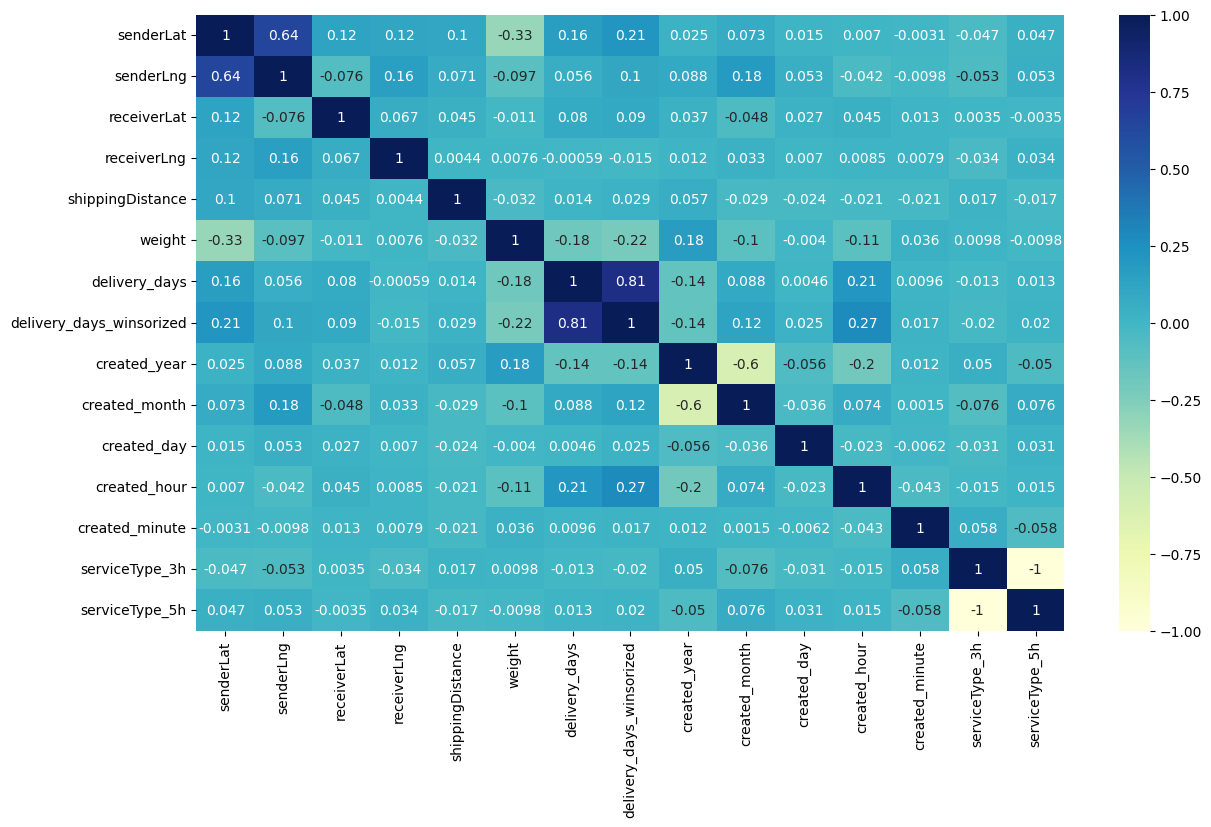

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df_encoded.select_dtypes(include=np.number)

# Calculate correlation matrix on numeric columns
plt.figure(figsize=(14, 8))
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
df['delivery_days_winsorized'].describe()

,delivery_days_winsorized
count,2234.000000
mean,0.201253
std,0.214860
min,0.034722
25%,0.069444
50%,0.106250
75%,0.205382
max,0.773611


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2234 entries, 0 to 2402
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2234 non-null   object        
 1   createdAt                 2234 non-null   datetime64[ns]
 2   deliveredAt               2234 non-null   datetime64[ns]
 3   expectedDeliveryTime      2234 non-null   datetime64[ns]
 4   mdh                       2234 non-null   object        
 5   package_name              2234 non-null   object        
 6   orderStatus               2234 non-null   object        
 7   senderAddress             2234 non-null   object        
 8   senderLat                 2234 non-null   float64       
 9   senderLng                 2234 non-null   float64       
 10  receiverAddress           2234 non-null   object        
 11  receiverLat               2234 non-null   float64       
 12  receiverLng              

In [ ]:
df['shippingDistance'].head()

,shippingDistance
0,8.701
1,7.196
2,1.864
4,6.830
5,2.452


In [ ]:
df.head()

,id,createdAt,deliveredAt,expectedDeliveryTime,mdh,package_name,orderStatus,senderAddress,senderLat,senderLng,...,weight,serviceType,image,delivery_days,delivery_days_winsorized,created_year,created_month,created_day,created_hour,created_minute
0,64c4c52b553721daabdbada4,2023-07-22 18:00:00,2023-07-29 16:34:00,2023-07-23 10:00:00,23203F4315CE0,TEST2,success,"Cà phê Vườn Chim, Nơ Trang Long, Phường 13, Bì...",10.819962,106.698637,...,1.5,5h,https://res.cloudinary.com/dsaqkqvem/image/upl...,6.940278,0.773611,2023,7,22,18,0
1,64d1bcb2a2a8ec9990ba219b,2023-08-08 10:55:00,2023-08-08 14:15:00,2023-08-08 13:55:00,2322090BA219B,Kombucha,success,"95T Trần Văn Đang, phường 9, Quận 3, Thành phố...",10.783267,106.675843,...,4.0,3h,https://res.cloudinary.com/dsaqkqvem/image/upl...,0.138889,0.138889,2023,8,8,10,55
2,64c4c52b553721daabdbad9b,2023-07-25 13:39:00,2023-07-26 09:35:00,2023-07-26 10:39:00,23206F9622FAE,Kombucha,success,"95T Trần Văn Đang, phường 9, Quận 3, Thành phố...",10.783267,106.675843,...,1.5,5h,https://res.cloudinary.com/dsaqkqvem/image/upl...,0.830556,0.773611,2023,7,25,13,39
4,64c4c52b553721daabdbadaf,2023-07-20 11:37:00,2023-07-20 21:35:00,2023-07-20 22:37:00,2320172DF6817,Konbuchachacha,success,"Chung Cư Sài Gòn Avenue, Đường Số 4, khu phố 4...",10.864284,106.734470,...,1.5,5h,https://res.cloudinary.com/dsaqkqvem/image/upl...,0.415278,0.415278,2023,7,20,11,37
5,654cfce5480368a817f6a525,2023-11-09 22:38:00,2023-11-10 10:20:00,2023-11-10 17:37:00,2331317F6A525,2 Nước,success,"95T Trần Văn Đang, phường 9, Quận 3, Thành phố...",10.783267,106.675843,...,2.0,5h,https://imagedelivery.net/EBM00qQu6QSanfe3UU8A...,0.487500,0.487500,2023,11,9,22,38


## **BUILD MODEL**

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf

# **Feature selection**

In [ ]:
x_features = np.concatenate([time_features_scaled, numeric_features_scaled, service_type_encoded], axis=1)

y = df['delivery_days_winsorized']

x_train, x_val, y_train, y_val = train_test_split(x_features, y, test_size=0.2, random_state=42)

In [ ]:
print(x_features.shape)
print(y.shape)

(2234, 8)
(2234,)


In [ ]:
print(time_features_scaled[:5])

[[-2.16771299  0.33017386  0.7136408   1.41975648 -1.66132034]
 [-2.16771299  0.72609893 -0.93796714 -0.48748103  1.46456294]
 [-2.16771299  0.33017386  1.06755678  0.22773304  0.55521508]
 [-2.16771299  0.33017386  0.47769681 -0.24907634  0.4415466 ]
 [-2.16771299  1.91387414 -0.81999514  2.37337523  0.49838084]]


In [ ]:
print(numeric_features_scaled[:5])

[[-0.07185234]
 [-0.13531245]
 [-0.36014253]
 [-0.15074527]
 [-0.33534882]]


In [ ]:
print(x_train[:5])

[[ 0.46131568 -0.46167628 -0.23013516 -0.01067165  0.21420963 -0.0318788
   1.          0.        ]
 [ 0.46131568 -1.25352642 -1.05593913 -0.48748103  0.32787811 -0.39648978
   0.          1.        ]
 [ 0.46131568  0.72609893 -1.17391113 -0.48748103  1.23722598 -0.00261547
   1.          0.        ]
 [ 0.46131568  0.33017386 -1.7637711  -0.48748103  0.10054115 -0.00354313
   0.          1.        ]
 [ 0.46131568 -0.06575121  1.42147277 -0.24907634 -0.9224752   0.0404362
   1.          0.        ]]


In [ ]:
print(np.any(np.isnan(x_val)))
print(np.any(np.isnan(y_val)))

False
False


In [ ]:
#scale = StandardScaler()
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_val_scaled = scale.transform(x_val)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# **RANDOM**

In [ ]:
rf = RandomForestRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=10)
rf.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf.predict(x_val_scaled)

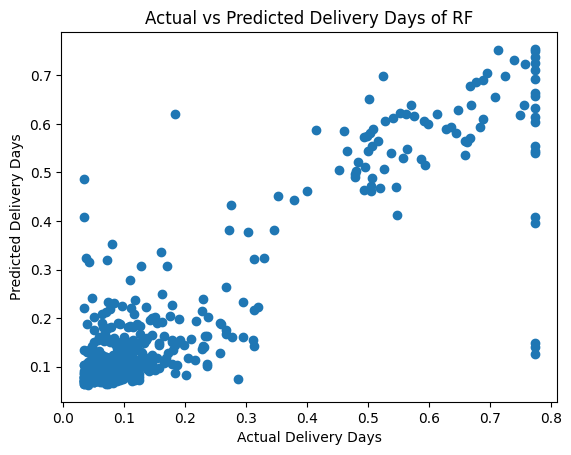

In [ ]:
plt.scatter(y_val, y_pred_rf)
plt.xlabel('Actual Delivery Days')
plt.ylabel('Predicted Delivery Days')
plt.title('Actual vs Predicted Delivery Days of RF')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
# Đánh giá mô hình rf
mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Randomforest - Mean Squared Error: {mse_rf}")
print(f"Randomforest - Mean Absolute Error: {mae_rf}")
print(f"Randomforest: {r2_rf}")
print(f"Randomforest - Root Mean Squared Error: {rmse_rf}")

Randomforest - Mean Squared Error: 0.009401135154500872
Randomforest - Mean Absolute Error: 0.05901621172182712
Randomforest: 0.7950807973724282
Randomforest - Root Mean Squared Error: 0.09695945108394989


In [ ]:
prd = pd.DataFrame({'Actual Delivery Days': y_val, 'Predicted Delivery Days': y_pred_rf})

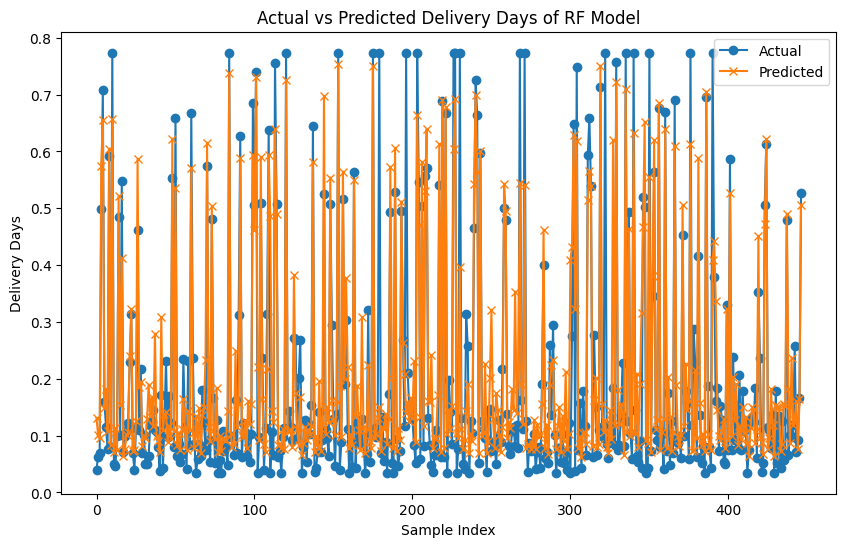

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.plot(y_val.values, label='Actual', marker='o')

plt.plot(y_pred_rf, label='Predicted', marker='x')

plt.title('Actual vs Predicted Delivery Days of RF Model')
plt.xlabel('Sample Index')
plt.ylabel('Delivery Days')
plt.legend()

plt.show()


In [ ]:
import joblib

# Save fitted transformers
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_numeric, 'numeric_scaler.pkl')
joblib.dump(encoder, 'onehot_encoder.pkl')

# Save your trained model
joblib.dump(rf, 'rf.pkl')

['rf.pkl']

In [ ]:
import numpy as np
import pandas as pd

# Load the previously saved fitted transformers
scaler_time = joblib.load('scaler_time.pkl')
scaler_numeric = joblib.load('numeric_scaler.pkl')
encoder = joblib.load('onehot_encoder.pkl')

# Load your trained model
rf = joblib.load('rf.pkl')


In [ ]:
# Example new data
new_data = {
    'createdAt': '2024-10-21 10:30:00',  # Timestamp
    'shippingDistance': 5000.0,            # Numeric feature
    'serviceType': '3h'
}

# Convert 'createdAt' to datetime and extract time features
new_data_df = pd.DataFrame([new_data])
new_data_df['createdAt'] = pd.to_datetime(new_data_df['createdAt'])
new_data_df['created_year'] = new_data_df['createdAt'].dt.year
new_data_df['created_month'] = new_data_df['createdAt'].dt.month
new_data_df['created_day'] = new_data_df['createdAt'].dt.day
new_data_df['created_hour'] = new_data_df['createdAt'].dt.hour
new_data_df['created_minute'] = new_data_df['createdAt'].dt.minute

# Prepare time features
time_features_new = new_data_df[['created_year', 'created_month', 'created_day', 'created_hour', 'created_minute']]

# Use the loaded scaler for time features
time_features_scaled_new = scaler_time.transform(time_features_new)

# Prepare numeric features
numeric_features_new = new_data_df[['shippingDistance']]
numeric_features_scaled_new = scaler_numeric.transform(numeric_features_new)

# One-hot encode serviceType using the loaded encoder
service_type_encoded_new = encoder.transform(new_data_df[['serviceType']])

# Label encode package_name using the loaded label encoder
#package_encoded_new = label_encoder.transform(new_data_df['package_name'])

# Combine all features
x_new = np.concatenate([time_features_scaled_new, numeric_features_scaled_new, service_type_encoded_new], axis=1)

# Use the same scaler for numeric features (if used previously)
x_new_scaled = scale.transform(x_new)

# Predict using the loaded model
y_pred_new = rf.predict(x_new_scaled)

print(f"Predicted delivery time in days: {y_pred_new[0]}")


Predicted delivery time in days: 0.15951083361313473


# **XGBOOST**

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb_model = xgb.XGBRegressor(n_estimators=100,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    reg_lambda=2,
    seed=200,
    random_state=42)

xgb_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Dự đoán
y_pred_xgb = xgb_model.predict(x_val_scaled)

In [ ]:
# Đánh giá mô hình
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - Mean Absolute Error: {mae_xgb}")
print(f"XGBoost - Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost - R²: {r2_xgb}")

XGBoost - Mean Squared Error: 0.008204732140035493
XGBoost - Mean Absolute Error: 0.054846247430060176
XGBoost - Root Mean Squared Error: 0.09057997648506812
XGBoost - R²: 0.821159132351805


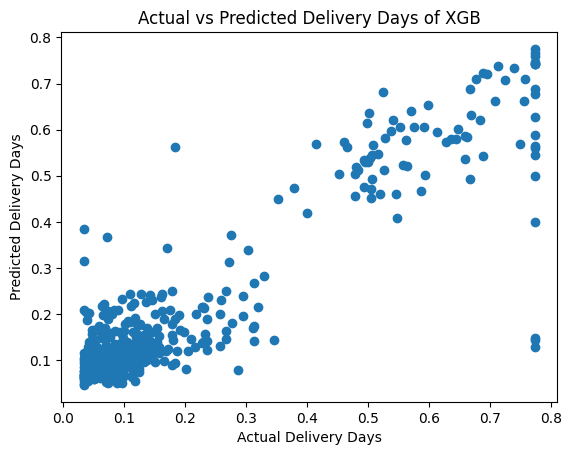

In [ ]:
plt.scatter(y_val, y_pred_xgb)
plt.xlabel('Actual Delivery Days')
plt.ylabel('Predicted Delivery Days')
plt.title('Actual vs Predicted Delivery Days of XGB')
plt.show()

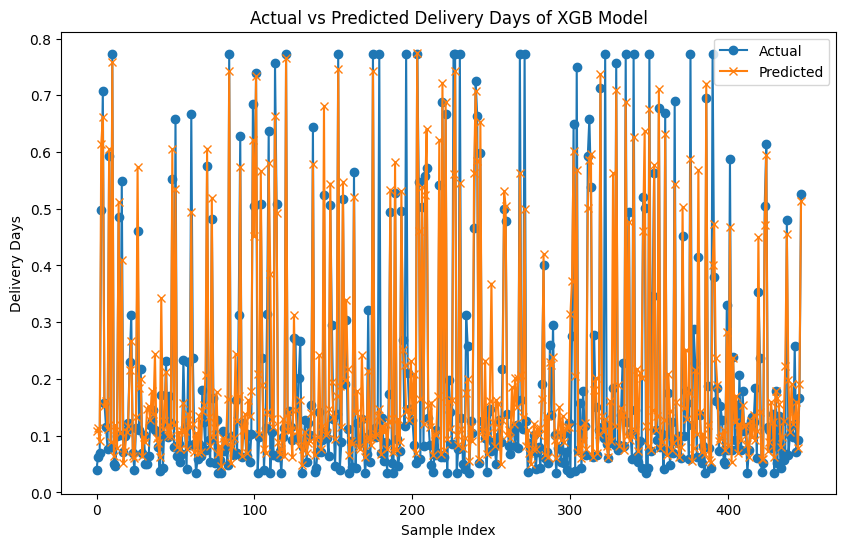

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_val contains the actual values and predictions contain the predicted values

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_val.values, label='Actual', marker='o')

# Plot predicted values
plt.plot(y_pred_xgb, label='Predicted', marker='x')

# Add labels and title
plt.title('Actual vs Predicted Delivery Days of XGB Model')
plt.xlabel('Sample Index')
plt.ylabel('Delivery Days')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import joblib

# Save fitted transformers
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_numeric, 'numeric_scaler.pkl')
joblib.dump(encoder, 'onehot_encoder.pkl')
#joblib.dump(label_encoder, 'label_encoder.pkl')

# Save your trained model
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [ ]:
import joblib

# Load the previously saved fitted transformers
scaler_time = joblib.load('scaler_time.pkl')
scaler_numeric = joblib.load('numeric_scaler.pkl')
encoder = joblib.load('onehot_encoder.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Load your trained model
xgb_model = joblib.load('xgb_model.pkl')


# **GRADIENT**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.05,
    random_state=42)

gb_model.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, random_state=42)

In [ ]:
# Dự đoán
y_pred_gb = gb_model.predict(x_val_scaled)

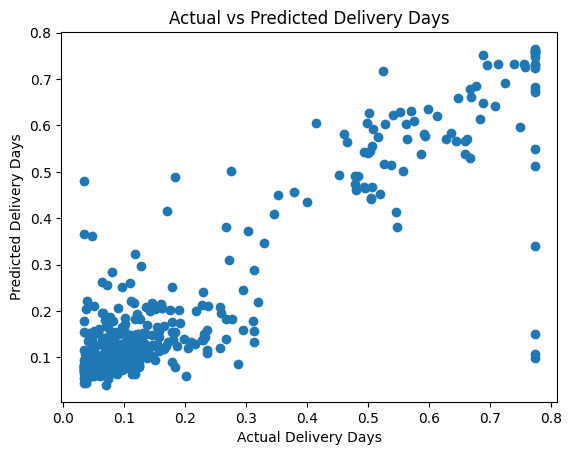

In [ ]:
plt.scatter(y_val, y_pred_gb)
plt.xlabel('Actual Delivery Days')
plt.ylabel('Predicted Delivery Days')
plt.title('Actual vs Predicted Delivery Days')
plt.show()

In [ ]:
mse_gb = mean_squared_error(y_val, y_pred_gb)
mae_gb = mean_absolute_error(y_val, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_val, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - Mean Absolute Error: {mae_gb}")
print(f"Gradient Boosting - Root Mean Squared Error: {rmse_gb}")
print(f"Gradient Boosting - R²: {r2_gb}")

Gradient Boosting - Mean Squared Error: 0.008680949782948973
Gradient Boosting - Mean Absolute Error: 0.05523422845732305
Gradient Boosting - Root Mean Squared Error: 0.09317161468467193
Gradient Boosting - R²: 0.8107788816630047


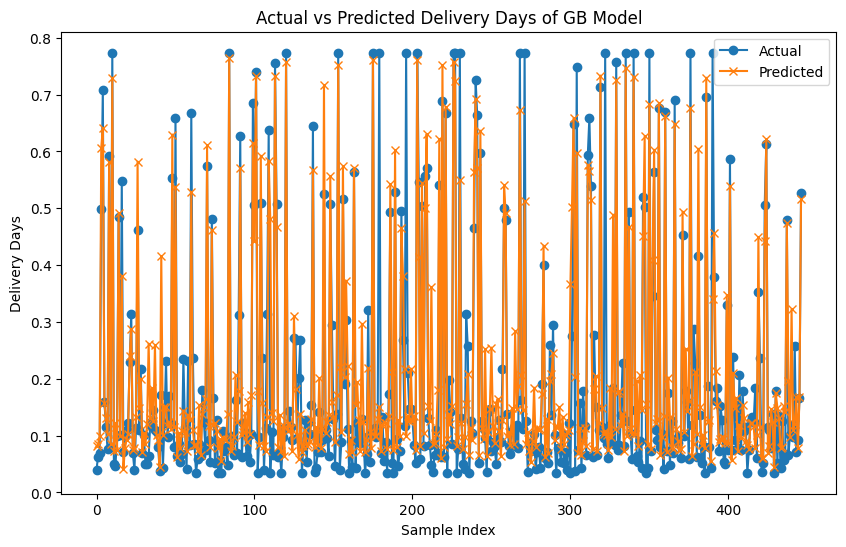

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_val contains the actual values and predictions contain the predicted values

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_val.values, label='Actual', marker='o')

# Plot predicted values
plt.plot(y_pred_gb, label='Predicted', marker='x')

# Add labels and title
plt.title('Actual vs Predicted Delivery Days of GB Model')
plt.xlabel('Sample Index')
plt.ylabel('Delivery Days')
plt.legend()

# Show the plot
plt.show()